In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, Excel file I/O (e.g. pd.read_excel)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', 50)
pd.options.display.max_rows = 999

In [2]:
xls = pd.ExcelFile('./Balance1.xlsx')
df_paquetes = pd.read_excel(xls, 'paquetes')
df_periodosrecetas = pd.read_excel(xls, 'periodosrecetas')
df_pr_razones = pd.read_excel(xls, 'pr_razones')
df_prospectos = pd.read_excel(xls, 'prospectos')



In [3]:
df_dictionary = pd.read_excel('./DataDictionary.xlsx','Aggre')
df_paquetes_columns = df_paquetes.columns
df_periodosrecetas_columns = df_periodosrecetas.columns
df_pr_razones_columns = df_pr_razones.columns
df_prospectos_columns =  df_prospectos.columns
dict_dictionary = dict(zip(df_dictionary['Field'], df_dictionary['Description']))

In [4]:
df_paquetes_list = []
df_periodosrecetas_list = []
df_pr_razones_list = []
df_prospectos_list = []

for i in range(len(df_paquetes_columns)):
    if df_paquetes_columns[i] in dict_dictionary.keys():
                    df_paquetes_list.append(dict_dictionary.get(df_paquetes_columns[i]))
    else:
        df_paquetes_list.append(df_paquetes_columns[i])

for i in range(len(df_periodosrecetas_columns)):
    if df_periodosrecetas_columns[i] in dict_dictionary.keys():
                    df_periodosrecetas_list.append(dict_dictionary.get(df_periodosrecetas_columns[i]))
    else:
        df_periodosrecetas_list.append(df_periodosrecetas_columns[i])
            
for i in range(len(df_pr_razones_columns)):
    if df_pr_razones_columns[i] in dict_dictionary.keys():
                    df_pr_razones_list.append(dict_dictionary.get(df_pr_razones_columns[i]))
    else:
        df_pr_razones_list.append(df_pr_razones_columns[i])
            
for i in range(len(df_prospectos_columns)):
    if df_prospectos_columns[i] in dict_dictionary.keys():
                    df_prospectos_list.append(dict_dictionary.get(df_prospectos_columns[i]))
    else:
        df_prospectos_list.append(df_prospectos_columns[i])
        
df_paquetes.columns = df_paquetes_list
df_periodosrecetas.columns = df_periodosrecetas_list
df_pr_razones.columns = df_pr_razones_list 
df_prospectos.columns = df_prospectos_list

In [5]:
print(df_paquetes.shape)
df_paquetes.isnull().sum(axis = 0).sort_values()
print(df_paquetes.head())

(11, 6)
   Patient Membership package    Descripcion  Order  DescripcionVE  ActivoVE  \
0                           1     PREVENTIVA     10     Preventivo         1   
1                           2       INTEGRAL     20  Integral Plus         0   
2                           3  INTEGRAL PLUS     30  Integral Plus         1   
3                           4       INFANTIL     40            NaN         0   
4                           5           OTRO     50            NaN         0   

   ActivoBAL  
0          1  
1          0  
2          1  
3          0  
4          0  


In [6]:
print(df_periodosrecetas.shape)
df_periodosrecetas.isnull().sum(axis = 0).sort_values()
print(df_periodosrecetas.head())

(32, 2)
   IdPeriodo Descripcion
0          1   Por 1 día
1          2  Por 2 días
2          3  Por 3 días
3          4  Por 4 días
4          5  Por 5 días


In [7]:
print(df_pr_razones.shape)
df_pr_razones.isnull().sum(axis = 0).sort_values()
print(df_pr_razones.head())

(6, 2)
   IdRazonPR                       Descripcion
0          1       Me mandan mucha información
1          2        No me interesa el Programa
2          3       No tengo a quien recomendar
3          4          No me lo explicaron bien
4          5  Mala experiencia con el programa


In [8]:
print(df_prospectos.shape)
df_prospectos.isnull().sum(axis = 0).sort_values()



(45525, 25)


IdProspecto                                    0
Branch id                                      0
Create Date                                    0
YearBirth                                     96
Town                                         257
State                                        260
Create Time                                  282
Marital status                               457
Sex                                          736
Username                                     816
Interest                                     819
glucose                                      819
Patient ID                                   819
Social Security                              879
HowInteger                                  1081
Ocupacion                                   1450
Have diabetes                               5900
Sales Advisor                               5951
How long ago did you have diabetes         19496
SpecifyAsInteger                           30495
Expectation         

In [9]:
#We decide to delete columns with more than 50% of missing values.
df_prospectos = df_prospectos.drop(columns=['Date Appointment'])
df_prospectos = df_prospectos.drop(columns=['Scholarship'])
df_prospectos = df_prospectos.drop(columns=['Reason'])
df_prospectos = df_prospectos.drop(columns=['How long ago did you have hypertension?'])
df_prospectos = df_prospectos.drop(columns=['Expectation'])
df_prospectos = df_prospectos.drop(columns=['SpecifyAsInteger'])

#Fill NA in numeric columns to be the median 
df_prospectos = df_prospectos.fillna(df_prospectos.median())
#Impute categorical variables by filling with most occurring class
df_prospectos = df_prospectos.apply(lambda x: x.fillna(x.value_counts().index[0]))

<ipython-input-9-e8488468fb44>:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_prospectos = df_prospectos.fillna(df_prospectos.median())


In [10]:
#Shape after removing all the missing columns > 50%
print(df_prospectos.shape)
print(df_prospectos.isnull().sum(axis = 0).sort_values())
print(df_prospectos.head())

(45525, 19)
IdProspecto                           0
Branch id                             0
Patient ID                            0
glucose                               0
HowInteger                            0
Interest                              0
Username                              0
Create Time                           0
Sales Advisor                         0
Create Date                           0
Social Security                       0
Ocupacion                             0
Marital status                        0
Sex                                   0
YearBirth                             0
State                                 0
Town                                  0
How long ago did you have diabetes    0
Have diabetes                         0
dtype: int64
   IdProspecto       Town       State  YearBirth Sex Marital status Ocupacion  \
0            4  MONTERREY  NUEVO LEÓN     1963.0   M     MATRIMONIO     HOGAR   
1            5   ESCOBEDO  NUEVO LEÓN     1960.0   M 

#Q1: Each team should create ten hypotheses to test about relationships between potential predictors and 
#diabetes patient engagement. An example might be that patients who live close to a clinic 
#are more likely to be highly engaged in their treatment.


1. Age: Different group of age might constitute different conceptions toward the diabetes treatment and hence create different engagement level.
2. Occupation: Different occupations might impact the hours/available time to stay engaged with the treatment / patients higher-paying occupation might be more concered about their health and they are more engaged than patients with lower income group.
3. Sex: Certain types of engagements migth bemore effective than women than for  men or vice versa.
4. Town, State: Distance from clinic like city and state might be a barrier to keep staying high engagement with patients. 
5. Interest: Interest towards any engagement activity might be useful to predict which intervention is more effective than others.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45525 entries, 0 to 45524
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   IdProspecto                         45525 non-null  int64         
 1   Town                                45525 non-null  object        
 2   State                               45525 non-null  object        
 3   YearBirth                           45525 non-null  float64       
 4   Sex                                 45525 non-null  object        
 5   Marital status                      45525 non-null  object        
 6   Ocupacion                           45525 non-null  object        
 7   Social Security                     45525 non-null  object        
 8   How long ago did you have diabetes  45525 non-null  object        
 9   Create Date                         45525 non-null  datetime64[ns]
 10  Create Time           

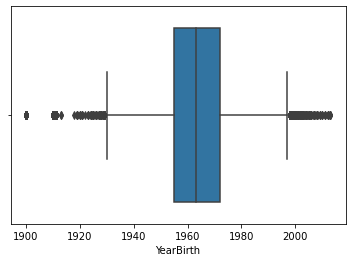

In [11]:
#Q2 Profiling should include at a minimum the number of records in a file, the fields in a record, and for each field, 
#the format of the data, units, the range of values, and summary statistics for numeric data. 
#You should create some data visualizations to understand the range of values and spot outliers

df_prospectos.info()
print(df_prospectos.describe())
sns.boxplot(x=df_prospectos["YearBirth"])
#There is one outlier in the YearBirth variable with YearBirt = 1900, we decide to remove that from our dataset.
df_prospectos = df_prospectos[df_prospectos["YearBirth"] != 1900]

AxesSubplot(0.125,0.125;0.775x0.755)


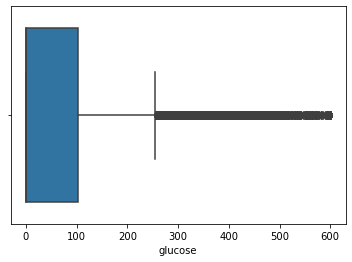

In [12]:
#Check any outlier for glucose and Have diabetes
print(sns.boxplot(x=df_prospectos["glucose"]))
df_filtered_prospectos = df_prospectos[np.abs(df_prospectos["glucose"]-df_prospectos["glucose"].mean()) <= (3*df_prospectos["glucose"].std())] 

AxesSubplot(0.125,0.125;0.775x0.755)


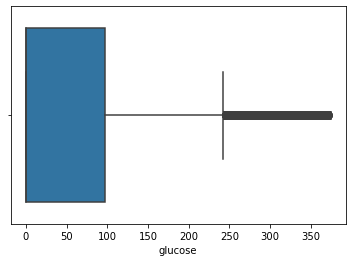

In [13]:
#After removing extreme large values > 3SD
print(sns.boxplot(x=df_filtered_prospectos["glucose"]))

<AxesSubplot:>

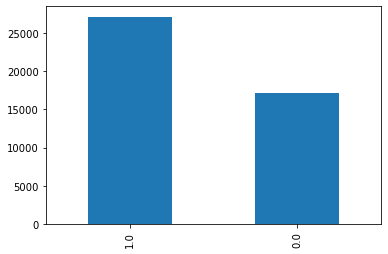

In [14]:
#Histogram for have diabetes
df_filtered_prospectos['Have diabetes'].value_counts().plot(kind='bar')
#Comments: around 65% of people have diabetes

<AxesSubplot:>

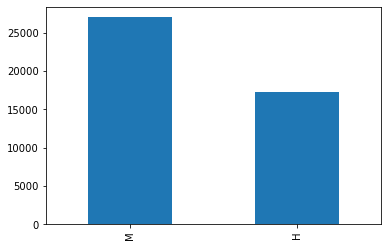

In [15]:
#Histobram for Sex
df_filtered_prospectos['Sex'].value_counts().plot(kind='bar')
#Comments: More Male patients than Female patients
#df.groupby('colour').size().plot(kind='bar')

<AxesSubplot:>

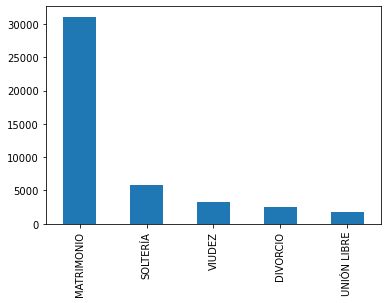

In [16]:
#Histrobram for Marital status
df_filtered_prospectos['Marital status'].value_counts().plot(kind='bar')

#Matrimonio -> Married from majroity of the people

<AxesSubplot:>

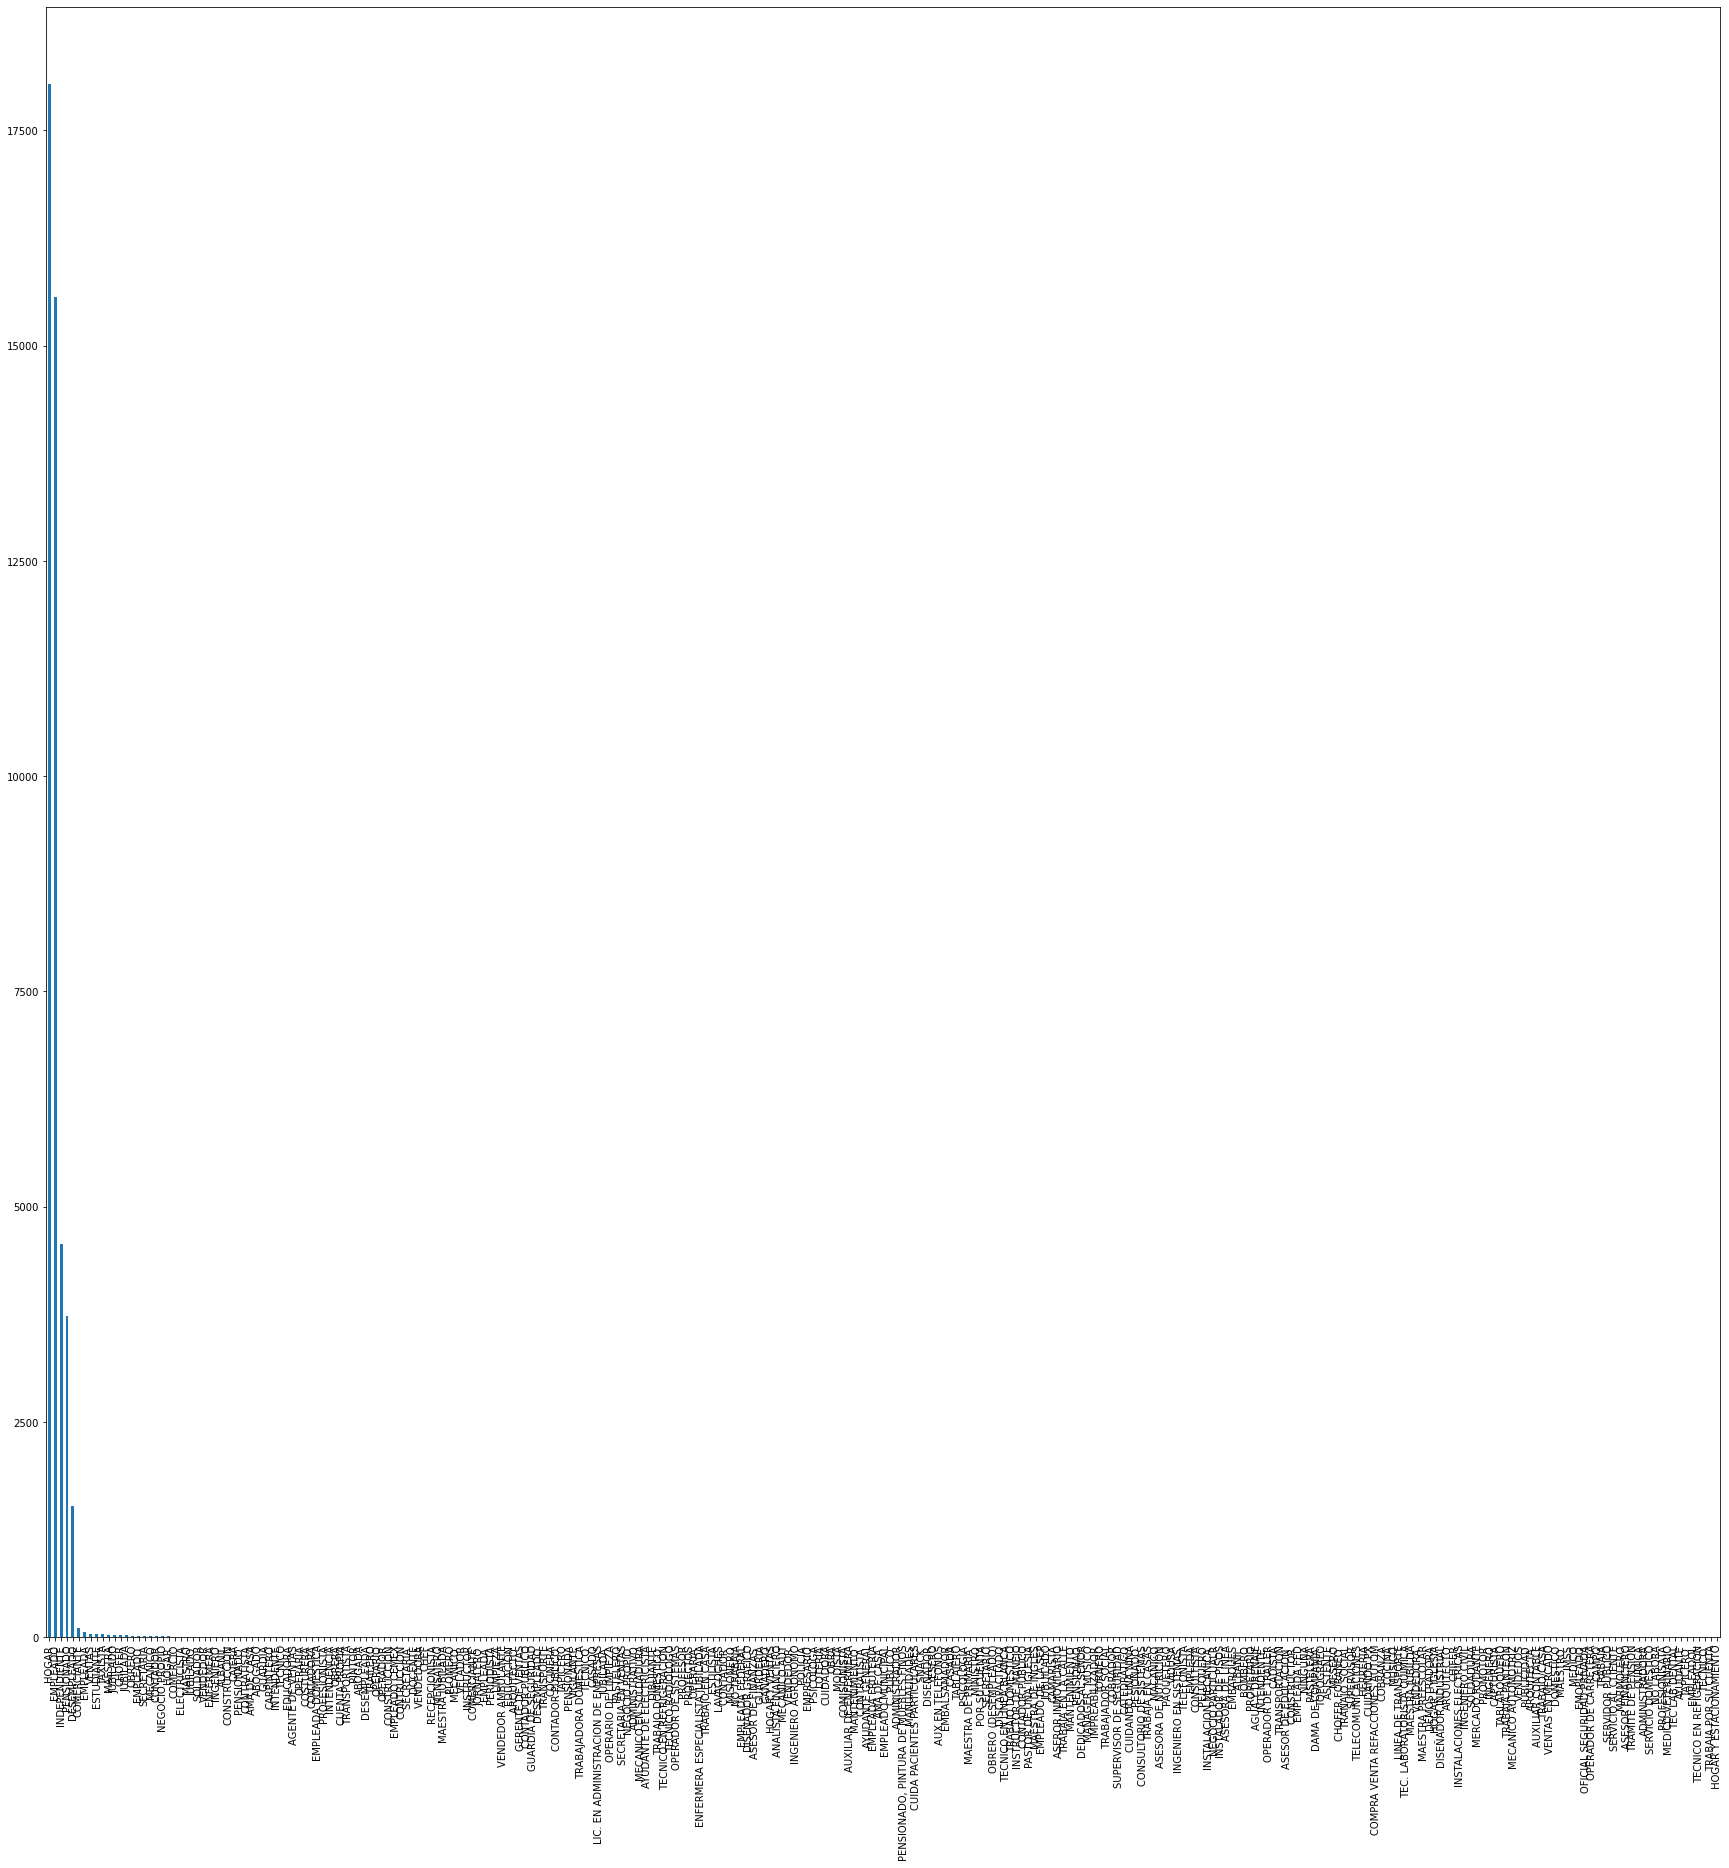

In [17]:
#Histobram for Ocupacion
fig, ax = plt.subplots(figsize=(30, 30))
df_filtered_prospectos['Ocupacion'].value_counts().plot(kind='bar')

#Comments: Few occupations are way more higher than other.

In [18]:
df_filtered_prospectos.groupby('Ocupacion')['Ocupacion'].count().sort_values(ascending=False)
#HOGAR, EMPLEADO, INDEPENDIENTE, PENSIONADO, DESEMPLEADO

Ocupacion
HOGAR                                   18037
EMPLEADO                                15570
INDEPENDIENTE                            4563
PENSIONADO                               3729
DESEMPLEADO                              1526
COMERCIANTE                               113
EMPLEADA                                   63
VENTAS                                     40
TAXISTA                                    33
ESTUDIANTE                                 33
MAESTRA                                    29
JUBILADO                                   28
CHOFER                                     22
JUBILADA                                   21
OBRERO                                     17
SECRETARIA                                 14
EMPLEADO                                   14
MECANICO                                   12
CONTADOR                                   11
NEGOCIO PROPIO                             10
HOGAR                                      10
ELECTRICISTA            

In [19]:
#Group by occupation and have diabetes
df_filtered_prospectos.groupby(['Ocupacion', 'Have diabetes'])['Have diabetes'].count().sort_values(ascending=False)

#people with some occupations are correlated with higher chance of getting diabetes. 

Ocupacion                             Have diabetes
HOGAR                                 1.0              11531
EMPLEADO                              1.0               8664
                                      0.0               6906
HOGAR                                 0.0               6506
INDEPENDIENTE                         1.0               2715
PENSIONADO                            1.0               2560
INDEPENDIENTE                         0.0               1848
PENSIONADO                            0.0               1169
DESEMPLEADO                           1.0                772
                                      0.0                754
COMERCIANTE                           1.0                113
EMPLEADA                              1.0                 63
VENTAS                                1.0                 40
ESTUDIANTE                            1.0                 33
TAXISTA                               1.0                 33
MAESTRA                          

In [24]:
#Group by Town, State and have diabetes
df_filtered_prospectos.groupby(['Town','State'])['IdProspecto'].count().sort_values(ascending=False)

#Most patients are from NUEVO LEÓN: MONTERREY, GUADALUPE, APODACA (~50%)

Town                         State               
MONTERREY                    NUEVO LEÓN              10813
GUADALUPE                    NUEVO LEÓN               6657
APODACA                      NUEVO LEÓN               4523
SANTA CATARINA               NUEVO LEÓN               4298
SAN NICOLÁS DE LOS GARZA     NUEVO LEÓN               3967
GENERAL ESCOBEDO             NUEVO LEÓN               3057
ESCOBEDO                     NUEVO LEÓN               1744
JUÁREZ                       NUEVO LEÓN               1173
MONTERREY                    NUEVO LEÓN               1122
GARCÍA                       NUEVO LEÓN                806
SANTA CATARINA               NUEVO LEÓN                650
SAN PEDRO GARZA GARCÍA       NUEVO LEÓN                642
JUAREZ                       NUEVO LEÓN                551
SAN PEDRO                    NUEVO LEÓN                422
GARCIA                       NUEVO LEÓN                353
GUADALUPE                    NUEVO LEÓN                322
GPE   

In [20]:
#Q3  Skips appointment, from the input file Balance – Tablas (Parte 1)
#Cancels appointment, from the input file Balance – Tablas (Parte 1)
#Reschedules appointment, from the input file Balance – Tablas (Parte 1)




In [ ]:
#Q4 Demographics, from the input files Balance – Tablas (Parte 1). For example marital status could be derived from EstadoCivil
#Geography, from the input files Balance – Tablas (Parte 1). For example,
#distance from clinic is dependent on city and state which are in Ciudad and Estado respectively

#Demographics: IdProspecto , Sex, YearBirth, Marital status, Ocupacion, Have diabetes 
    
#Geography: IdProspecto ,'Town','State'

In [ ]:
#Q1: after dropping above columns, use median imputation for other columns.
